In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

You are helping a propsective student determine which colleges to which they should submit applicaitons. The data below is the results of the 2025 QS University Rankings. More informaiton can be found [here](https://support.qs.com/hc/en-gb/articles/4405955370898-QS-World-University-Rankings).

Your student lives in the United States currently. Is there a benefit to moving to a different counrty for school? Do larger schools invest more in reducing their environmental impact? Will their choice of school impact their ability to find a job? Will they be presented with opputunities to learn from other cultures as well as their own? 

Your main takeaway should be helping the student assess the differences for them if they chose different types and locations of school. Your main plot might signify a particular school or it might signify a certain size or location of schools. Consider the questions being asked and what might be most useful to this student in making their decision.

Our goal is to fouces on top 20 universityes and we going to check if those schools has connection to reputation

In [4]:
df = pd.read_csv("data.csv")
df.rename(columns=lambda x: x[0].lower() + x.strip().lower().replace(' ', '_')[1:], inplace=True)
df = df.convert_dtypes()
df

,2025_rank,2024_rank,institution_name,location,location_full,size,academic_reputation,employer_reputation,faculty_student,citations_per_faculty,international_faculty,international_students,international_research_network,employment_outcomes,sustainability,qs_overall_score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1498,1401+,1201-1400,University of Montana Missoula,US,United States,M,3.0,2.2,10.6,6.1,1.3,1.9,6.5,3.1,1.0,-
1499,1401+,1401+,University of Oradea,RO,Romania,L,5.6,2.2,4.0,1.9,1.5,5.2,34.5,6.2,2.3,-
1500,1401+,1201-1400,University of San Carlos,PH,Philippines,M,7.2,9.4,3.3,1.8,2.1,2.1,6.4,9.6,1.0,-
1501,1401+,1401+,"University Politehnica of Timisoara, UPT",RO,Romania,L,4.1,4.2,7.2,3.9,1.4,2.5,18.6,3.9,1.1,-


#Question 1
 Which institons made a significant leap in the Ranking from 2024 to 2025. We get to see how top schools that are 

C:\Users\Nuwan\AppData\Local\Temp\ipykernel_1760\284544062.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rank_change', y='institution_name', data=top_20_institutions, palette='viridis')


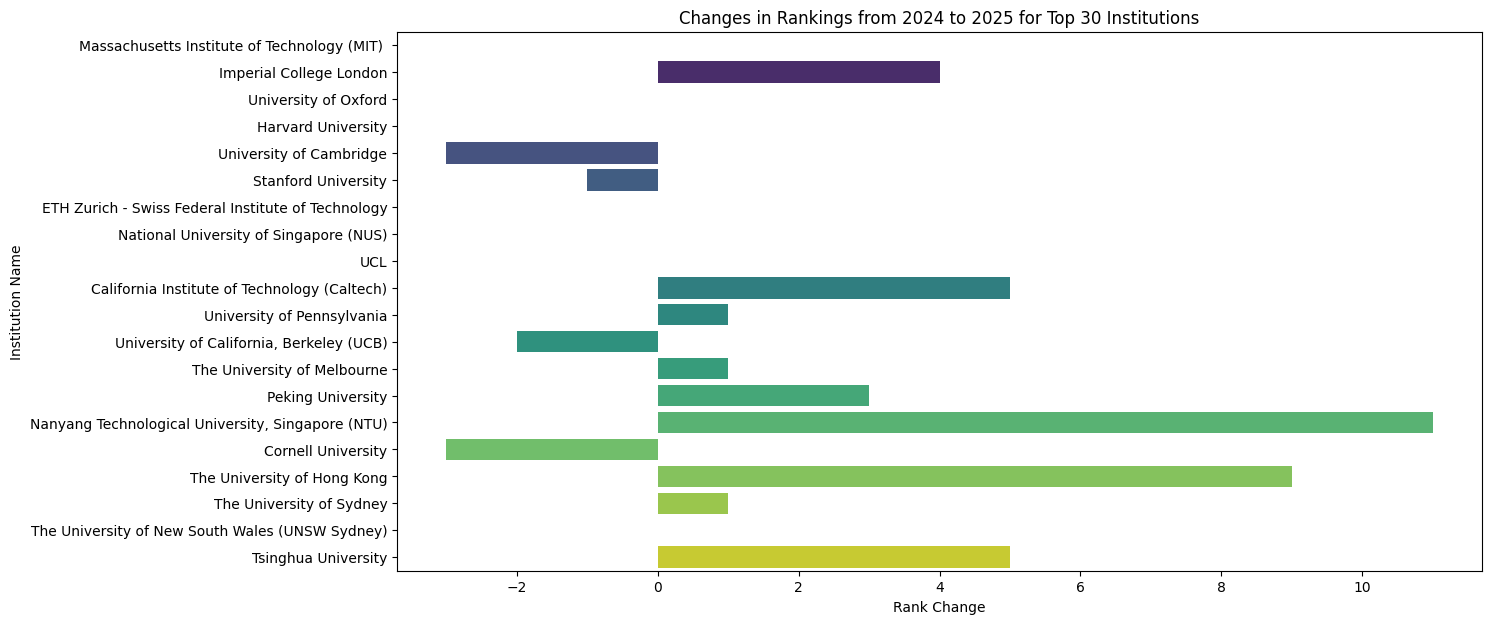

In [15]:
df['2024_rank'] = pd.to_numeric(df['2024_rank'], errors='coerce')
df['2025_rank'] = pd.to_numeric(df['2025_rank'], errors='coerce')

top_20_institutions = df.head(20).copy()
top_20_institutions['rank_change'] = top_20_institutions['2024_rank'] - top_20_institutions['2025_rank']

plt.figure(figsize=(14, 7))
sns.barplot(x='rank_change', y='institution_name', data=top_20_institutions, palette='viridis')
plt.title('Changes in Rankings from 2024 to 2025 for Top 30 Institutions')
plt.xlabel('Rank Change')
plt.ylabel('Institution Name')
plt.show()

> I think this is beautiful. It makes it so easy to change who jumped the bigged in the rankings. Well done. But I would say the colors should be meaningful. Perhaps you could scale the colors green and red based on positive or negative changes. 

The above graph shows how changes in the Ranking of the top 20 schools. Next graph, we going to look at the most ranking changes happend in the 2024 year and 2025 year.

C:\Users\Nuwan\AppData\Local\Temp\ipykernel_24508\903539236.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rank_change', y='institution_name', data=top_20_rank_changes, palette='viridis')


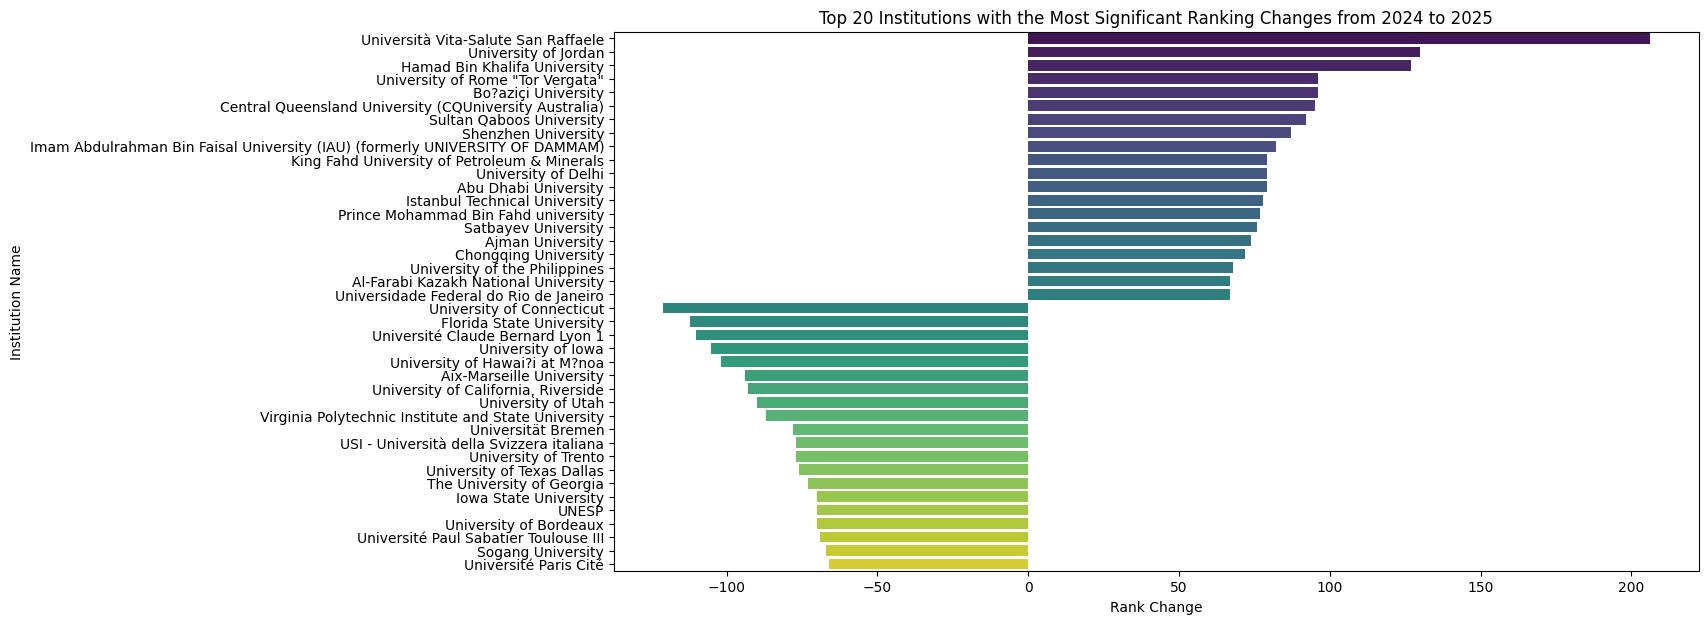

In [ ]:
df['2024_rank'] = pd.to_numeric(df['2024_rank'])
df['2025_rank'] = pd.to_numeric(df['2025_rank'])

# Calculate the rank change
df['rank_change'] = df['2024_rank'] - df['2025_rank']


top_20_rank_changes =pd.concat( [df.nlargest(20,'rank_change'), df.nsmallest(20,'rank_change')])


# 1. The Rise and Fall: Changes in rankings from 2024 to 2025
plt.figure(figsize=(14, 7))
sns.barplot(x='rank_change', y='institution_name', data=top_20_rank_changes, palette='viridis')
plt.title('Top 20 Institutions with the Most Significant Ranking Changes from 2024 to 2025')
plt.xlabel('Rank Change')
plt.ylabel('Institution Name')
plt.show()

> This feels to tight to be useful. It also feels nearly identical to the first plot. I would try something different here. Because you are looking for those who made the biggest jump, we can expect that the leaps will be huge. I would move this to fewer schools if you want it to work. 

Academic vs. Employer Reputation. We want to see reputation of the college employee with the accademic.

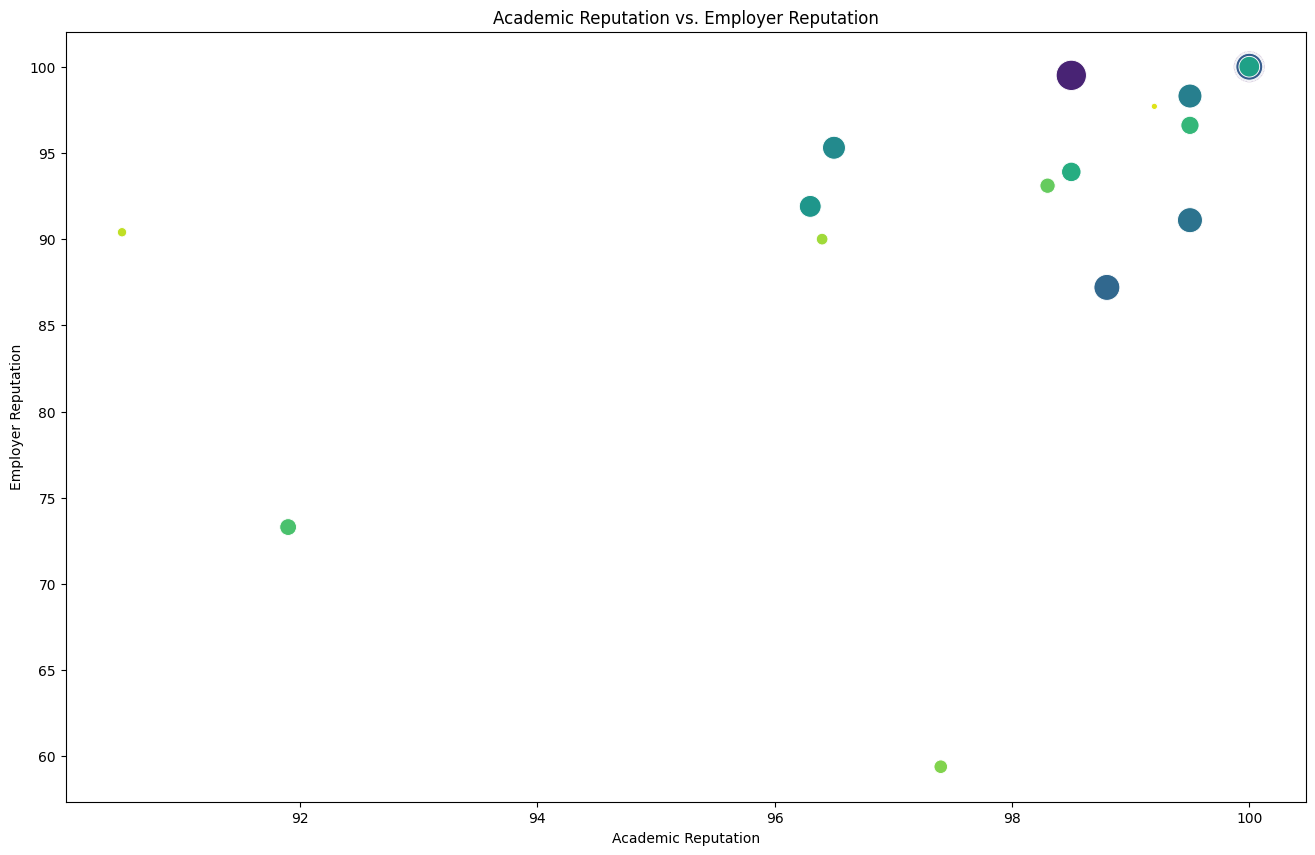

In [ ]:
plt.figure(figsize=(16, 10))
sns.scatterplot(x='academic_reputation', y='employer_reputation', size='qs_overall_score', hue='qs_overall_score', data=df.head(20).copy(), palette='viridis', sizes=(20, 500), legend=None)
plt.title('Academic Reputation vs. Employer Reputation')
plt.xlabel('Academic Reputation')
plt.ylabel('Employer Reputation')
plt.show()

> This needs a legend for the color scheme to make it readable. I would also include more schools on a plot like this as scatter plot trends are easier to see when there are more dots. 

Institutions with a rich international presence attract diverse student. Highlight those with the highest percentages of international students and faculty.

C:\Users\Nuwan\AppData\Local\Temp\ipykernel_24508\3869494628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='international_students', y='institution_name', data=top_20_institutions, palette='viridis', ax=axes[0])
C:\Users\Nuwan\AppData\Local\Temp\ipykernel_24508\3869494628.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='international_faculty', y='institution_name', data=top_20_institutions, palette='viridis', ax=axes[1])


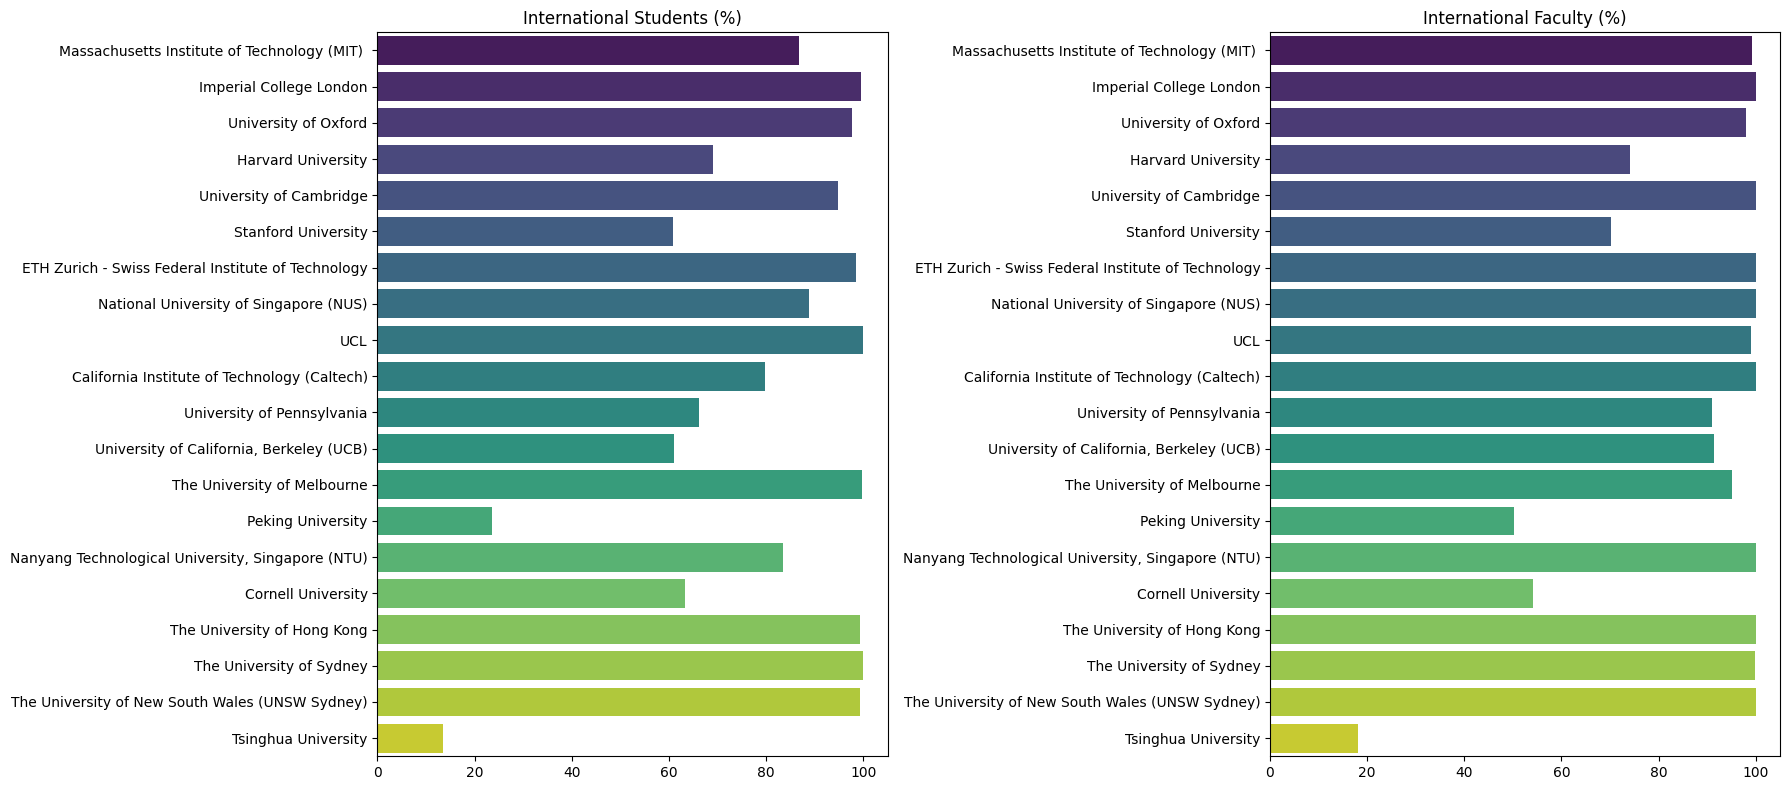

In [ ]:
top_20_institutions = df.head(20).copy()

fig, axes = plt.subplots(1, 2, figsize=(18, 8))
sns.barplot(x='international_students', y='institution_name', data=top_20_institutions, palette='viridis', ax=axes[0])
sns.barplot(x='international_faculty', y='institution_name', data=top_20_institutions, palette='viridis', ax=axes[1])

axes[0].set_title('International Students (%)')
axes[1].set_title('International Faculty (%)')

for ax in axes:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

> This would be better with a single color accross the schools. The different colors make it feel like there is supposed to be something meaningful about the colors. I also think this would be better as a dodged or stacked bar chart so that you can see the numbers for the same school side by side. Also I think somehting is wrong with your data, it is nearly impossible that so many schools have nearly 100% international students. 

The check  for Knowledge: Citations per Faculty. We looked at the reputation and percentages of international students and faculty, now we will look at Citations per Faculty. this will check for all faculty 

C:\Users\Nuwan\AppData\Local\Temp\ipykernel_24508\3018708881.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='citations_per_faculty', data=df.head(20).copy(), palette='viridis')


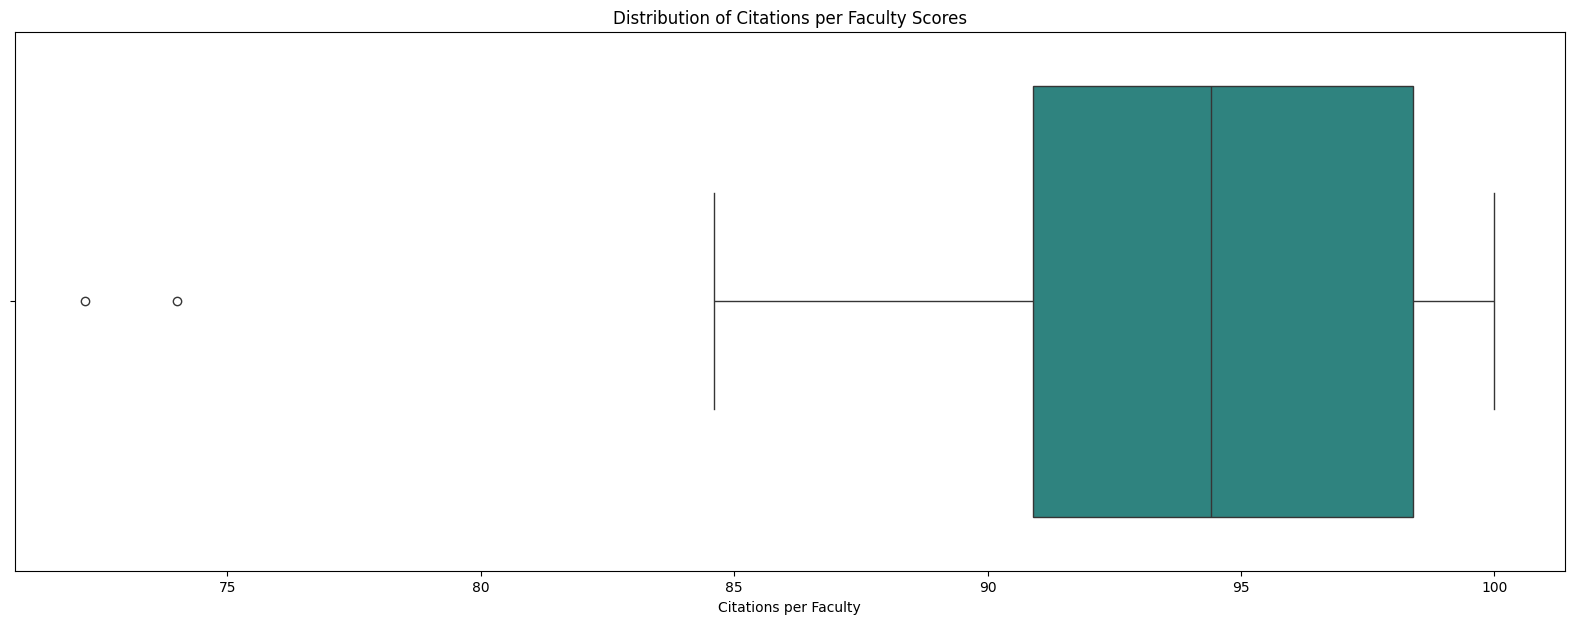

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='citations_per_faculty', data=df.head(20).copy(), palette='viridis')
plt.title('Distribution of Citations per Faculty Scores')
plt.xlabel('Citations per Faculty')
plt.show()

> Solid box plot. Shows the distribtion of these by faculty. It would have been helpful to also group this into multiple box plots. Its useful but a tad boring at the moment. 

below box plot will show what is the difference between all the colleges and only the top 20

C:\Users\Nuwan\AppData\Local\Temp\ipykernel_24508\2745266135.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='citations_per_faculty', data=df, palette='viridis')


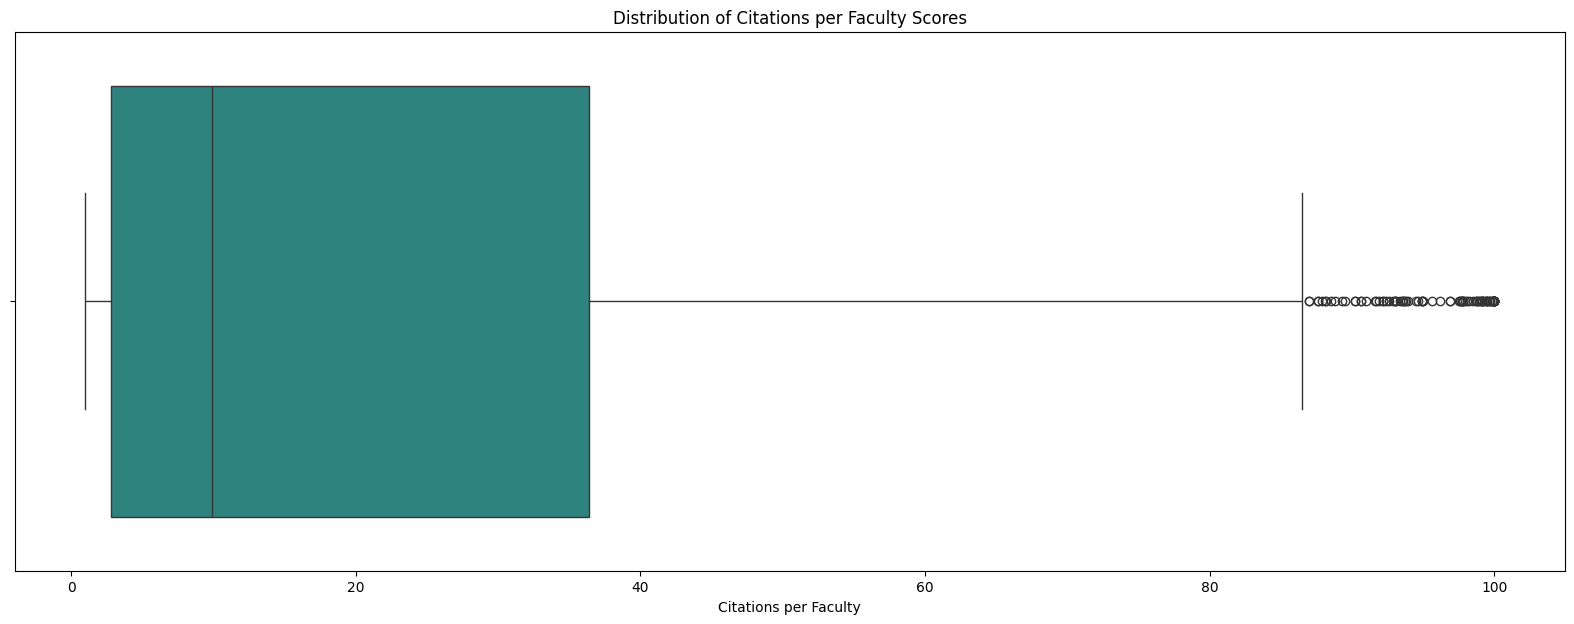

In [ ]:
plt.figure(figsize=(20, 7))
sns.boxplot(x='citations_per_faculty', data=df, palette='viridis')
plt.title('Distribution of Citations per Faculty Scores')
plt.xlabel('Citations per Faculty')
plt.show()

> This could have been shown with the top one side by side to make them WAY more useful as a comparison. Clearly the top schools produce WAY more output.

The Employment Legacy: Employment Outcomes

C:\Users\Nuwan\AppData\Local\Temp\ipykernel_1760\2181783509.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='employment_outcomes', y='institution_name', data=df.head(20).copy(), palette='viridis')


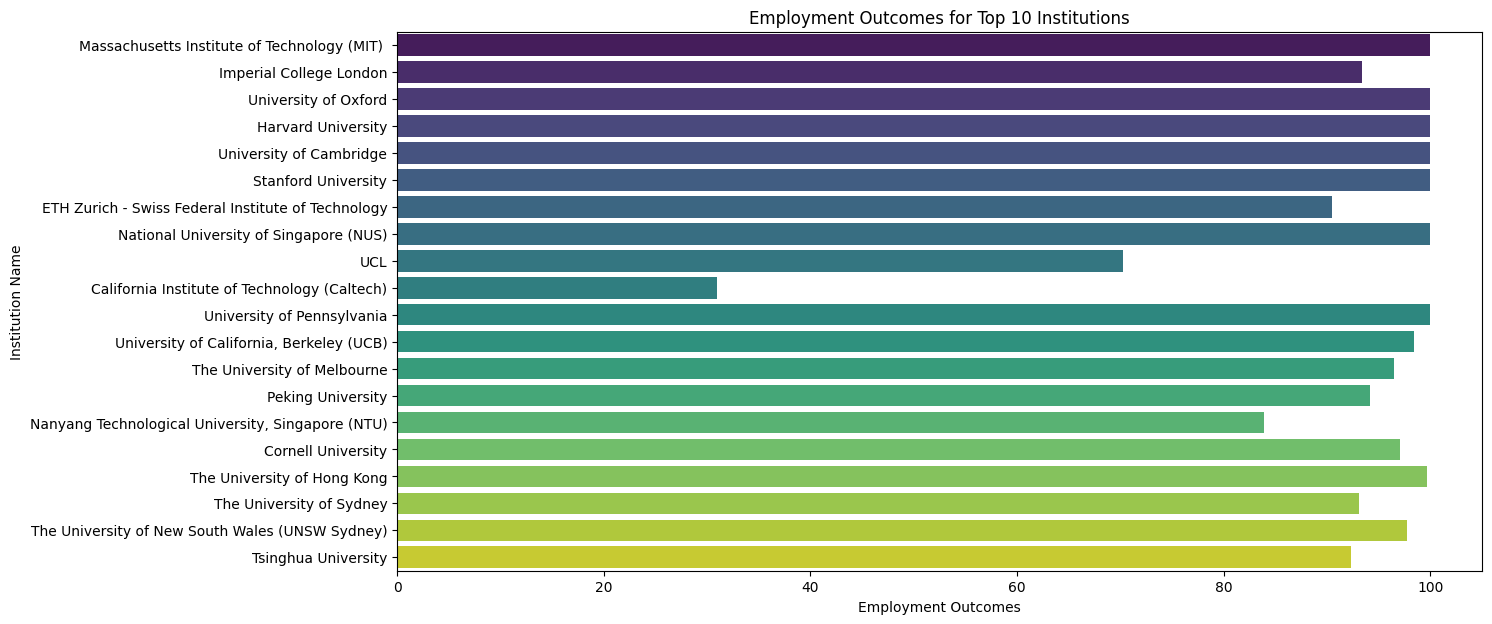

In [24]:
plt.figure(figsize=(14, 7))
sns.barplot(x='employment_outcomes', y='institution_name', data=df.head(20).copy(), palette='viridis')
plt.title('Employment Outcomes for Top 10 Institutions')
plt.xlabel('Employment Outcomes')
plt.ylabel('Institution Name')
plt.show()

> Is this a rating in the dataset? Check what this value means, it is not clear. Also unless the color means something I would keep it solid. You could color code here also based on positive or negtative change in the ratings. 